# Multi-Dimensional Scaling (MDS)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 3, 2
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams['font.size'] = 8

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data
y = iris.target
target_ids = np.unique(y)

In [3]:
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)

## The Multi-Dimensional Scaling (MDS) Algorithm
- Compute the matrix of squared pairwise similarities $D, D_{ij} = \| x _i - x_j\|^2$

In [4]:
data = X
ndata = np.shape(data)[0]
ndim = np.shape(data)[1]
d = np.zeros((ndata,ndata),dtype=float)
	
	# Compute the distance matrix
	# Inefficient -- not matrices
for i in range(ndata):
	for j in range(i+1,ndata):
		for k in range(ndim):
			d[i,j] += (data[i,k] - data[j,k])**2
		d[i,j] = np.sqrt(d[i,j])
		d[j,i] = d[i,j]
            

- Compute $J = I_N −1/N$ (where $I_N$ is the $N×N$ identity function and $N$ is the number of datapoints)

In [5]:
J = np.eye(ndata) - np.ones((ndata, ndata))/ndata
J.shape

(1000, 1000)

- Compute $B = \frac{1}{2} JDJ^T$

In [6]:
B = -J.dot(d).dot(J.T)/2
B.shape

(1000, 1000)

- Find the $L$ largest eigenvalues $\lambda_i$ of $B$, together with the corresponding eigenvectors $e_i$

In [7]:
evals, evecs = np.linalg.eigh(B)

In [8]:
# Sort by eigenvalue in descending order                                                  
idx   = np.argsort(evals)[::-1]
evals = evals[idx]
evecs = evecs[:,idx]
 


In [9]:
evals.shape

(1000,)

In [10]:
# Compute the coordinates using positive-eigenvalued components only                      
w, = np.where(evals > 0)
L  = np.diag(np.sqrt(evals[w]))
V  = evecs[:,w]
Y  = V.dot(L)

In [11]:
Y.shape

(1000, 1000)

In [12]:
trans_data = Y[:,0:2]

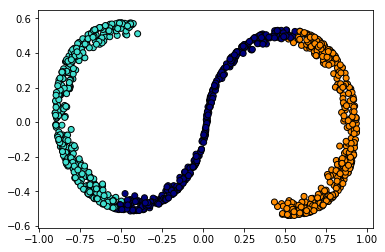

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['turquoise', 'navy', 'darkorange'])
plt.scatter(trans_data[:, 0], trans_data[:, 1], c=color, marker='o',edgecolors='black',cmap=cmap_light)
plt.show()

In [14]:
from sklearn import manifold, datasets

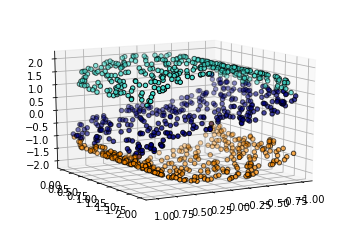

In [15]:

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color,marker='o',edgecolors='black', cmap=cmap_light)
ax.view_init(14, 60)
plt.show()

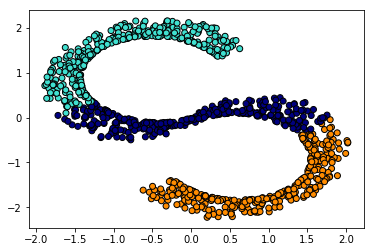

In [16]:

mds = manifold.MDS(2)
MDS = mds.fit_transform(X)
plt.scatter(MDS[:, 0], MDS[:, 1], c=color, marker='o',edgecolors='black',cmap=cmap_light)
plt.show()